In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

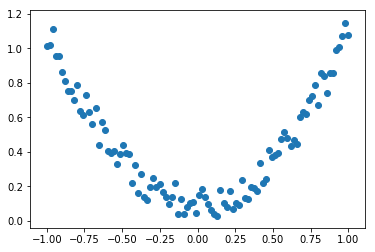

In [9]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
type(x)
y = x.pow(2)+ 0.2*torch.rand(x.size())

x = Variable(x)
y = Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [13]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)      #hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)       # output layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x))   # activation function for hidden layer
        x = self.predict(x)          # linear output
        return x


In [16]:
regression_net = Net(n_features=1,n_hidden=10,n_output=1)
print(regression_net)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [24]:
optimizer = torch.optim.SGD(regression_net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()                                         # this is for regression mean squared loss

In [25]:
plt.ion()   # something about plotting

In [29]:
for t in range(100):
    prediction = regression_net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()     # clear gradients for next train
    loss.backward()           # backpropagation, compute gradients
    optimizer.step()          # apply gradients
    
    print(loss.data[0])
    #if t % 10 == 0:
        # plot and show learning process
        #plt.cla()
        #plt.scatter(x.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        #plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        #plt.show()
        #plt.pause(0.2)

#plt.ioff()    
    

0.003828341607004404
0.003826757660135627
0.003825221676379442
0.003823731327429414
0.003822288243100047
0.0038208868354558945
0.0038195252418518066
0.0038182034622877836
0.0038168940227478743
0.0038156218361109495
0.003814385738223791
0.0038131820037961006
0.0038120157551020384
0.003810877911746502
0.0038097724318504333
0.003808694425970316
0.003807646222412586
0.0038066247943788767
0.003805631771683693
0.0038046622648835182
0.003803717205300927
0.0038027968257665634
0.0038018992636352777
0.0038010210264474154
0.003800166305154562
0.003799332305788994
0.0037985160015523434
0.0037977215833961964
0.0037969439290463924
0.0037961832713335752
0.0037954410072416067
0.003794715739786625
0.0037940063048154116
0.003793311072513461
0.0037926321383565664
0.0037919669412076473
0.0037913164123892784
0.0037906793877482414
0.003790056798607111
0.0037894463166594505
0.0037888481747359037
0.003788260743021965
0.0037876861169934273
0.0037871224340051413
0.003786570392549038
0.00378602952696383
0.003785